###### Feature Information

PassengerID: Unique ID number

Survived: 0 = No, 1 = Yes

Pclass: Ticket class (1, 2, or 3)

Name: Passenger name

Sex: Male or Female

Age: Age in years

SibSp: # of siblings/spouses aboard the Titanic

Parch: # of parents/children aboard the Titanic

Ticket: Ticket #

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Imports

In [1252]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import random

# Obtain

Load train & test data as dataframes from csv files

In [1253]:
# Import training/testing data using pandas

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [1254]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1255]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Scrub

In [1256]:
# Combine train and test data into one dataframe

train_features = train.drop('Survived', axis=1)
df = pd.concat([train_features, test], axis=0, ignore_index=True)

In [1257]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1258]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Check data types and check for any missing values

In [1259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


One-Hot Encode 'Sex'

In [1260]:
sex_dummy = pd.get_dummies(df.Sex, drop_first=True)
df = pd.concat([df, sex_dummy], axis=1)
df = df.drop('Sex', axis=1)

In [1261]:
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [1262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 103.7+ KB


Fill 'Embarked' with most common label

In [1263]:
df.Embarked.fillna('S', inplace=True)

Fill missing 'Fare' value with 0

In [1264]:
df.Fare.fillna(0, inplace=True)

In [1265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(1)
memory usage: 103.7+ KB


Drop 'Cabin' feature

In [1266]:
df['Cabin'].fillna(0, inplace=True)

for i in range(len(df)):
    if df.iloc[i]['Cabin'] != 0:
        df.set_value(i, 'Cabin', 1)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [1267]:
df.Cabin = df.Cabin.astype('int64')

Drop 'Ticket' feature

In [1268]:
df = df.drop('Ticket', axis=1)

In [1269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Fare           1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
male           1309 non-null uint8
dtypes: float64(2), int64(5), object(2), uint8(1)
memory usage: 93.4+ KB


Impute missing 'Age' values based on medians grouped by Pclass, male

In [1270]:
grouped_df = df.groupby(by=['Pclass', 'male'], as_index=False).median()

In [1271]:
grouped_df[['Pclass', 'male', 'Age']]

,Pclass,male,Age
0,1,0,36.0
1,1,1,42.0
2,2,0,28.0
3,2,1,29.5
4,3,0,22.0
5,3,1,25.0


In [1272]:
def impute_age(df):
    
    df.Age.fillna(0, inplace=True)
    
    for i in range(len(df)):
        
        if 'Master' in df.iloc[i]['Name']:
            df.set_value(i, 'Age', random.randint(1,10))
        
        elif 'Master' not in df.iloc[i]['Name']:
        
            if df.iloc[i]['Pclass'] == 1 and df.iloc[i]['Age'] == 0:
                if df.iloc[i]['male'] == 0:
                    df.set_value(i, 'Age', grouped_df.iloc[0]['Age'])
                else:
                    df.set_value(i, 'Age', grouped_df.iloc[1]['Age'])

            elif df.iloc[i]['Pclass'] == 2 and df.iloc[i]['Age'] == 0:
                if df.iloc[i]['male'] == 0:
                    df.set_value(i, 'Age', grouped_df.iloc[2]['Age'])
                else:
                    df.set_value(i, 'Age', grouped_df.iloc[3]['Age'])

            elif df.iloc[i]['Pclass'] == 3 and df.iloc[i]['Age'] == 0:
                if df.iloc[i]['male'] == 0:
                    df.set_value(i, 'Age', grouped_df.iloc[4]['Age'])
                else:
                    df.set_value(i, 'Age', grouped_df.iloc[5]['Age'])

impute_age(df)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release

Combine SibSp and Parch into one feature called 'Family'

In [1273]:
df['family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], inplace=True, axis=1)

In [1274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Age            1309 non-null float64
Fare           1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
male           1309 non-null uint8
family         1309 non-null int64
dtypes: float64(2), int64(4), object(2), uint8(1)
memory usage: 83.2+ KB


In [1275]:
df.Age.value_counts()

25.00    170
22.00    107
24.00     47
42.00     46
36.00     42
        ... 
74.00      1
22.50      1
76.00      1
66.00      1
0.92       1
Name: Age, Length: 94, dtype: int64

Extract title from names

In [1276]:
def title_from_name(df):
    df['title'] = None
    
    for i in range(len(df)):
        
        if 'Mr.' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Mr')
        elif 'Mrs.' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Mrs')
        elif 'Miss' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Miss')
        elif 'Master' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Master')
        elif 'Rev.' in df.iloc[i]['Name']:
            df.set_value(i, 'title', 'Rev')
        else:
            df.set_value(i, 'title', 'Other')
            
title_from_name(df)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site

In [1277]:
df.title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      26
Rev         8
Name: title, dtype: int64

In [1278]:
train_data = pd.concat([df[:len(train)], train.Survived], axis=1)

In [1279]:
train_data['Died'] = 1 - train['Survived']

In [1280]:
train_data

,PassengerId,Pclass,Name,Age,Fare,Cabin,Embarked,male,family,title,Survived,Died
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,0,S,1,1,Mr,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,C,0,1,Mrs,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,0,S,0,0,Miss,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,S,0,1,Mrs,1,0
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,0,S,1,0,Mr,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.0,13.0000,0,S,1,0,Rev,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,30.0000,1,S,0,0,Miss,1,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",22.0,23.4500,0,S,0,3,Miss,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,30.0000,1,C,1,0,Mr,1,0


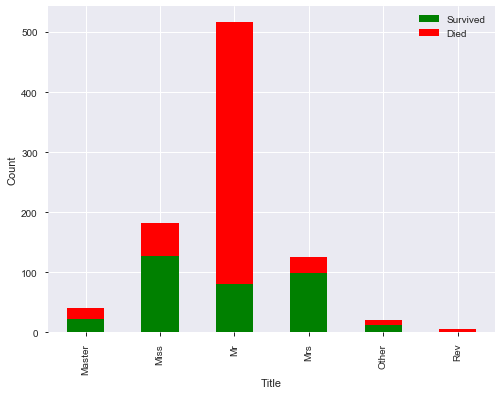

In [1281]:
ax = train_data.groupby('title').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Title')
ax.set_ylabel('Count');

# Explore

In [1282]:
train_data.head()

,PassengerId,Pclass,Name,Age,Fare,Cabin,Embarked,male,family,title,Survived,Died
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,0,S,1,1,Mr,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,C,0,1,Mrs,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,0,S,0,0,Miss,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,S,0,1,Mrs,1,0
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,0,S,1,0,Mr,0,1


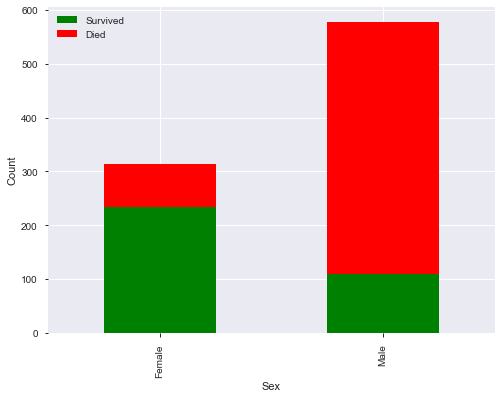

In [1283]:
ax = train_data.groupby('male').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_xticklabels(['Female', 'Male']);

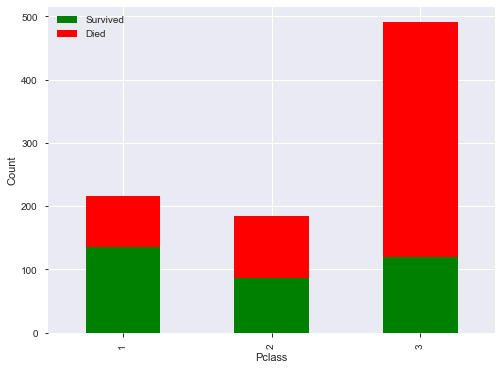

In [1284]:
ax = train_data.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Pclass')
ax.set_ylabel('Count')
ax.set_xticklabels(['1', '2', '3']);

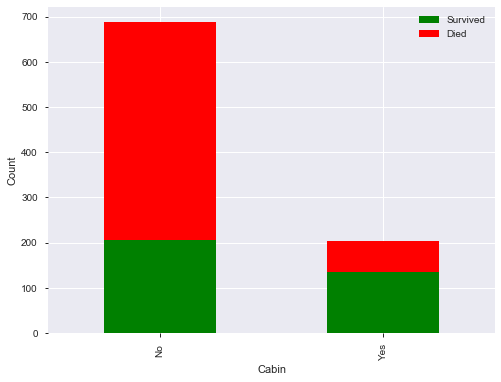

In [1285]:
ax = train_data.groupby('Cabin').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Cabin')
ax.set_ylabel('Count')
ax.set_xticklabels(['No', 'Yes']);

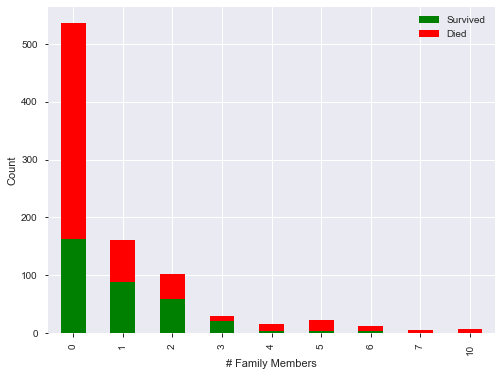

In [1286]:
ax = train_data.groupby('family').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('# Family Members')
ax.set_ylabel('Count');

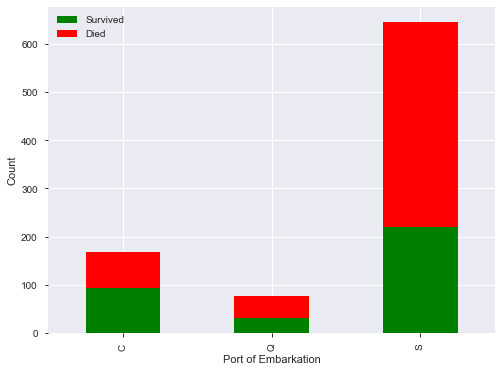

In [1287]:
ax = train_data.groupby('Embarked').agg('sum')[['Survived', 'Died']].plot(
    kind='bar', figsize=(8,6), stacked=True, color=['g', 'r'])
ax.set_xlabel('Port of Embarkation')
ax.set_ylabel('Count');

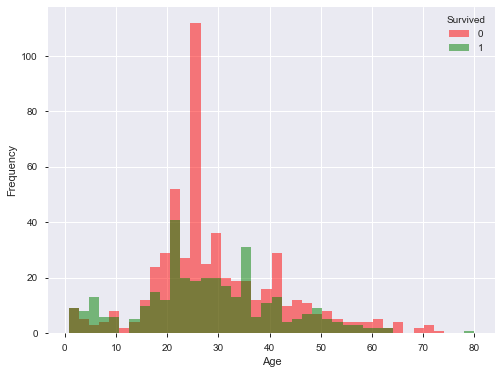

In [1288]:
ax = train_data.pivot(columns='Survived', values='Age').plot.hist(bins=40, 
                                                                  alpha=0.5,
                                                                 color=['r', 'g'],
                                                                 figsize=(8,6))
ax.set_xlabel('Age');

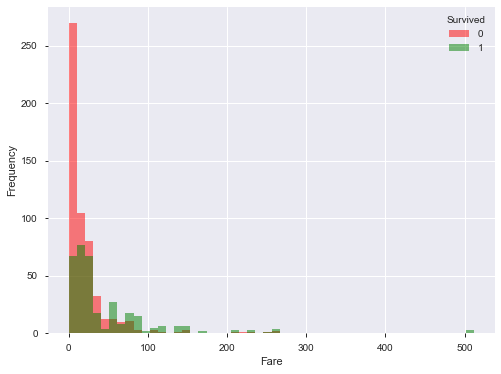

In [1289]:
ax = train_data.pivot(columns='Survived', values='Fare').plot.hist(bins=50, 
                                                                  alpha=0.5,
                                                                 color=['r', 'g'],
                                                                 figsize=(8,6))
ax.set_xlabel('Fare');

# Feature Engineering

In [1290]:
df.head()

,PassengerId,Pclass,Name,Age,Fare,Cabin,Embarked,male,family,title
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,0,S,1,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,C,0,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,0,S,0,0,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,S,0,1,Mrs
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,0,S,1,0,Mr


In [1291]:
df = df.drop(['Name'], axis=1)

In [1292]:
df.head()

,PassengerId,Pclass,Age,Fare,Cabin,Embarked,male,family,title
0,1,3,22.0,7.2500,0,S,1,1,Mr
1,2,1,38.0,71.2833,1,C,0,1,Mrs
2,3,3,26.0,7.9250,0,S,0,0,Miss
3,4,1,35.0,53.1000,1,S,0,1,Mrs
4,5,3,35.0,8.0500,0,S,1,0,Mr


In [1293]:
e_dummies = pd.get_dummies(df.Embarked, prefix='emb')
df = pd.concat([df, e_dummies], axis=1)
df = df.drop('Embarked', axis=1)

In [1294]:
df.head()

,PassengerId,Pclass,Age,Fare,Cabin,male,family,title,emb_C,emb_Q,emb_S
0,1,3,22.0,7.2500,0,1,1,Mr,0,0,1
1,2,1,38.0,71.2833,1,0,1,Mrs,1,0,0
2,3,3,26.0,7.9250,0,0,0,Miss,0,0,1
3,4,1,35.0,53.1000,1,0,1,Mrs,0,0,1
4,5,3,35.0,8.0500,0,1,0,Mr,0,0,1


In [1295]:
t_dummies = pd.get_dummies(df.title, prefix='title')
df = pd.concat([df, t_dummies], axis=1)
df = df.drop('title', axis=1)

In [1296]:
df.head()

,PassengerId,Pclass,Age,Fare,Cabin,male,family,emb_C,emb_Q,emb_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other,title_Rev
0,1,3,22.0,7.2500,0,1,1,0,0,1,0,0,1,0,0,0
1,2,1,38.0,71.2833,1,0,1,1,0,0,0,0,0,1,0,0
2,3,3,26.0,7.9250,0,0,0,0,0,1,0,1,0,0,0,0
3,4,1,35.0,53.1000,1,0,1,0,0,1,0,0,0,1,0,0
4,5,3,35.0,8.0500,0,1,0,0,0,1,0,0,1,0,0,0


In [1297]:
# new feature called ' minor ' if under age 18

df['minor'] = 0

for i in range(len(df)):
    
    if df.iloc[i]['Age'] < 18:
        df.set_value(i, 'minor', 1)
    else:
        df.set_value(i, 'minor', 0)

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [1298]:
# new features called 'alone_f' and 'alone_m'
df['alone_f'] = 0
df['alone_m'] = 0

for i in range(len(df)):
    
    if df.iloc[i]['male'] == 1:
        if df.iloc[i]['family'] == 0:
            df.set_value(i, 'alone_m', 1)
    else:
        if df.iloc[i]['family'] == 0:
            df.set_value(i, 'alone_f', 1)


C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


In [1299]:
# df.drop('Age', axis=1, inplace=True)

In [1300]:
# df.drop('male', axis=1, inplace=True)

In [1301]:
X = df[:len(train)]
y = train.Survived

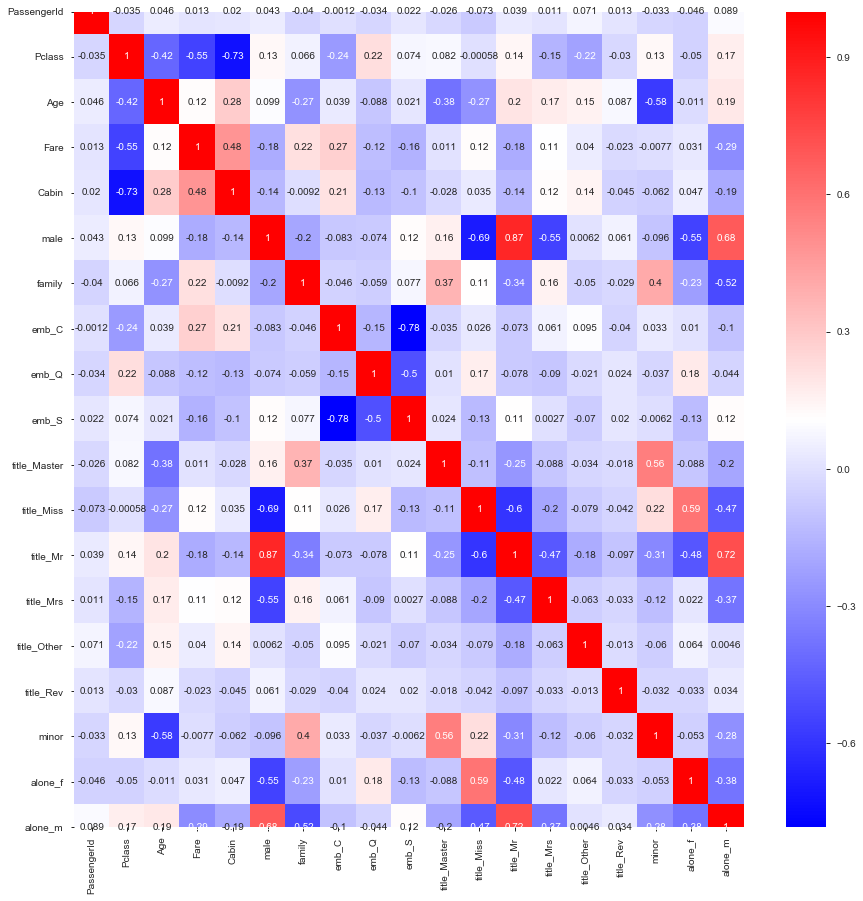

In [1302]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap='bwr');

In [1303]:
df.head()

,PassengerId,Pclass,Age,Fare,Cabin,male,family,emb_C,emb_Q,emb_S,title_Master,title_Miss,title_Mr,title_Mrs,title_Other,title_Rev,minor,alone_f,alone_m
0,1,3,22.0,7.2500,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,3,3,26.0,7.9250,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,5,3,35.0,8.0500,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


# Modeling

## Gender Predictor

In [1304]:
gender_pred = 1 - X.male

In [1305]:
gender_acc = round(accuracy_score(y, gender_pred), 2)

print(f'Gender Predictor Accuracy: {gender_acc}')

Gender Predictor Accuracy: 0.79


## KNN Classifier

In [1336]:
X = df.iloc[:len(train)][['Pclass', 'male', 'title_Master', 'Fare']]
y = train.Survived

train = pd.concat([X, y], axis=1)

In [1337]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

KNN Mean Train Accuracy: 0.87
KNN Mean Test Accuracy: 0.83


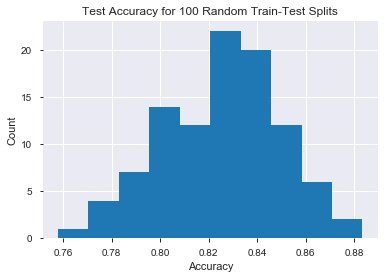

In [1338]:
print(f'KNN Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'KNN Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

## KNN Grid Search

In [1343]:
grid_params = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 51, 101],
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'euclidean', 'manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, cv=10)

gs.fit(X, y)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=minkowski, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=3, weights=uniform ................
[CV] . metric=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  metric=minkowski, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=5, weights=distance ...............
[CV]  

[CV]  metric=minkowski, n_neighbors=13, weights=uniform, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............
[CV]  metric=minkowski, n_neighbors=13, weights=distance, total=   0.0s
[CV] metric=minkowski, n_neighbors=13, weights=distance ..............


[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  

[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  metric=euclidean, n_neighbors=11, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[

[CV]  metric=euclidean, n_neighbors=101, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=uniform ..............
[CV]  metric=euclidean, n_neighbors=101, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=uniform ..............
[CV]  metric=euclidean, n_neighbors=101, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=uniform ..............
[CV]  metric=euclidean, n_neighbors=101, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=uniform ..............
[CV]  metric=euclidean, n_neighbors=101, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=uniform ..............
[CV]  metric=euclidean, n_neighbors=101, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=distance .............
[CV]  metric=euclidean, n_neighbors=101, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=101, weights=distance ............

[CV] . metric=manhattan, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=uniform ................
[CV] . metric=manhattan, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=manhattan, n_neighbors=9, weights=distance ...............
[CV]  

[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  metric=manhattan, n_neighbors=51, weights=uniform, total=   0.0s
[CV] metric=manhattan, n_neighbors=51, weights=uniform ...............
[CV]  

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:    2.5s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 51, 101],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [1344]:
best_knn = gs.best_params_
best_knn

{'metric': 'manhattan', 'n_neighbors': 51, 'weights': 'distance'}

In [1341]:
train_acc = []
test_acc = []

for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                       random_state=i,
                                                       stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    knn = KNeighborsClassifier(**best_knn)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))

KNN Mean Train Accuracy: 0.92
KNN Mean Test Accuracy: 0.85


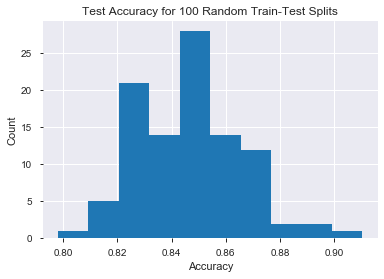

In [1342]:
print(f'KNN Mean Train Accuracy: {round(np.mean(train_acc),2)}')
print(f'KNN Mean Test Accuracy: {round(np.mean(test_acc),2)}')

plt.hist(test_acc)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Test Accuracy for 100 Random Train-Test Splits')
plt.show();

# Submission

In [984]:
test_knn = df[len(train):][['Pclass', 'male', 'title_Master', 'Fare']]

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
test_sc = scaler.transform(test_knn)

In [985]:
knn = KNeighborsClassifier(**best_knn)
knn.fit(X_sc, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=51, p=2,
                     weights='distance')

In [986]:
sub_df = pd.DataFrame([])
sub_df['PassengerID'] = test.PassengerId
sub_df['Survived'] = knn.predict(test_sc)

In [987]:
sub_df

,PassengerID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [988]:
sub_df.to_csv('sub_knn_8-3_5.csv')